In [17]:
import pandas as pd


# **Load the Dataset**

In [18]:
data_f=pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
data_f.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [19]:
data_f.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,34515.000000,34518.000000,34518.000000,34518.000000,34514.000000,3.451800e+04,3.451400e+04
mean,98177.140229,2020.865664,55.751289,989.644099,32.028742,2.247590e+08,5.303222e+10
std,225.824493,2.942920,89.914766,7892.641612,14.879404,7.357503e+07,2.641276e+08
min,85338.000000,2002.000000,0.000000,0.000000,1.000000,2.770200e+04,4.013061e+09
25%,98034.000000,2019.000000,0.000000,0.000000,18.000000,1.875086e+08,5.303301e+10
50%,98108.000000,2022.000000,0.000000,0.000000,37.000000,2.351549e+08,5.303302e+10
75%,98188.000000,2023.000000,72.000000,0.000000,45.000000,2.590163e+08,5.303303e+10
max,99403.000000,2025.000000,337.000000,184400.000000,49.000000,4.789259e+08,5.307794e+10


In [20]:
data_f.shape

(34518, 17)

In [21]:
data_f.size

586806

In [22]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34518 entries, 0 to 34517
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         34518 non-null  object 
 1   County                                             34515 non-null  object 
 2   City                                               34515 non-null  object 
 3   State                                              34518 non-null  object 
 4   Postal Code                                        34515 non-null  float64
 5   Model Year                                         34518 non-null  int64  
 6   Make                                               34518 non-null  object 
 7   Model                                              34518 non-null  object 
 8   Electric Vehicle Type                              34518 non-null  object 
 9   Clean 

In [23]:
data_f.isnull().sum()

VIN (1-10)                                           0
County                                               3
City                                                 3
State                                                0
Postal Code                                          3
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 4
DOL Vehicle ID                                       0
Vehicle Location                                     3
Electric Utility                                     4
2020 Census Tract                                    4
dtype: int64

In [24]:
d=data_f['Electric Vehicle Type'].unique()
dn=data_f['Electric Vehicle Type'].nunique()
print(d)
print("number of unique values in Electric vehicle type : ",dn)

['Battery Electric Vehicle (BEV)' 'Plug-in Hybrid Electric Vehicle (PHEV)']
number of unique values in Electric vehicle type :  2


In [25]:
m=data_f['Electric Range'].mean()
print("mean of electric range : ",m)
md=data_f['Electric Range'].median()
print("median of electric range : ",md)
sd=data_f['Electric Range'].std()
print("standard deviation of electric range : ",sd)

mean of electric range :  55.75128918245553
median of electric range :  0.0
standard deviation of electric range :  89.91476616325784


In [26]:
Q1 = data_f['Electric Range'].quantile(0.25)
Q3 = data_f['Electric Range'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_f[(data_f['Electric Range'] < lower_bound) | (data_f['Electric Range'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
       VIN (1-10)     County        City State  Postal Code  Model Year  \
0      5YJSA1E22K       King     Seattle    WA      98112.0        2019   
3      5YJSA1H20F  Snohomish     Bothell    WA      98012.0        2015   
5      5YJ3E1EB6K       King     Redmond    WA      98052.0        2019   
6      5YJ3E1EB0J   Thurston        Yelm    WA      98597.0        2018   
8      5YJSA1E21H       King     Redmond    WA      98052.0        2017   
...           ...        ...         ...   ...          ...         ...   
34482  5YJXCAE27J  Snohomish       Brier    WA      98036.0        2018   
34484  5YJSA1E25J       King      Renton    WA      98059.0        2018   
34491  5YJYGDEE7L       King     Redmond    WA      98052.0        2020   
34496  5YJ3E1EA0L       King    Bellevue    WA      98005.0        2020   
34508  5YJYGDEFXL       King  North Bend    WA      98045.0        2020   

        Make    Model           Electric Vehicle Type  \
0      TESLA  MODEL S  Battery E

***5238 rows are outlires in this dataset***
# boxPlot

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

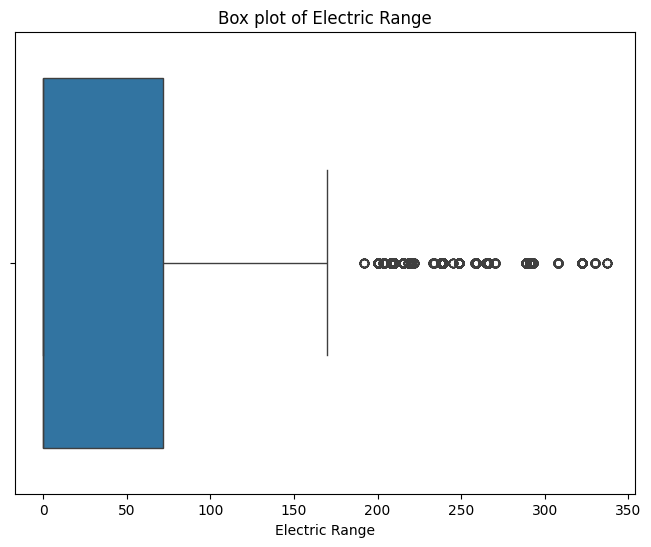

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_f['Electric Range'], data=data_f)
plt.title('Box plot of Electric Range')
plt.xlabel('Electric Range')
plt.show()

In [29]:
df=data_f.select_dtypes(include=['int64','float64'])
df.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98112.0,2019,270,0,43.0,202233958,5.303301e+10
1,98953.0,2024,20,0,15.0,264425178,5.307700e+10
2,98031.0,2015,84,0,11.0,114962025,5.303303e+10
3,98012.0,2015,208,0,1.0,232724670,5.306105e+10
4,98908.0,2022,42,0,14.0,221023589,5.307700e+10


In [30]:
correlation_matrix = df.corr()
correlation_matrix

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.053037,-0.002182,-0.004822,-0.363907,-0.008087,0.296735
Model Year,-0.053037,1.000000,-0.514117,-0.247217,-0.065894,0.169321,0.007274
Electric Range,-0.002182,-0.514117,1.000000,0.115898,0.050918,-0.108022,-0.008606
Base MSRP,-0.004822,-0.247217,0.115898,1.000000,0.022877,-0.034539,0.000624
Legislative District,-0.363907,-0.065894,0.050918,0.022877,1.000000,-0.034123,-0.050405
DOL Vehicle ID,-0.008087,0.169321,-0.108022,-0.034539,-0.034123,1.000000,-0.000381
2020 Census Tract,0.296735,0.007274,-0.008606,0.000624,-0.050405,-0.000381,1.000000


**Visualize the correlation matrix using a heatmap for better understanding of the relationships.**

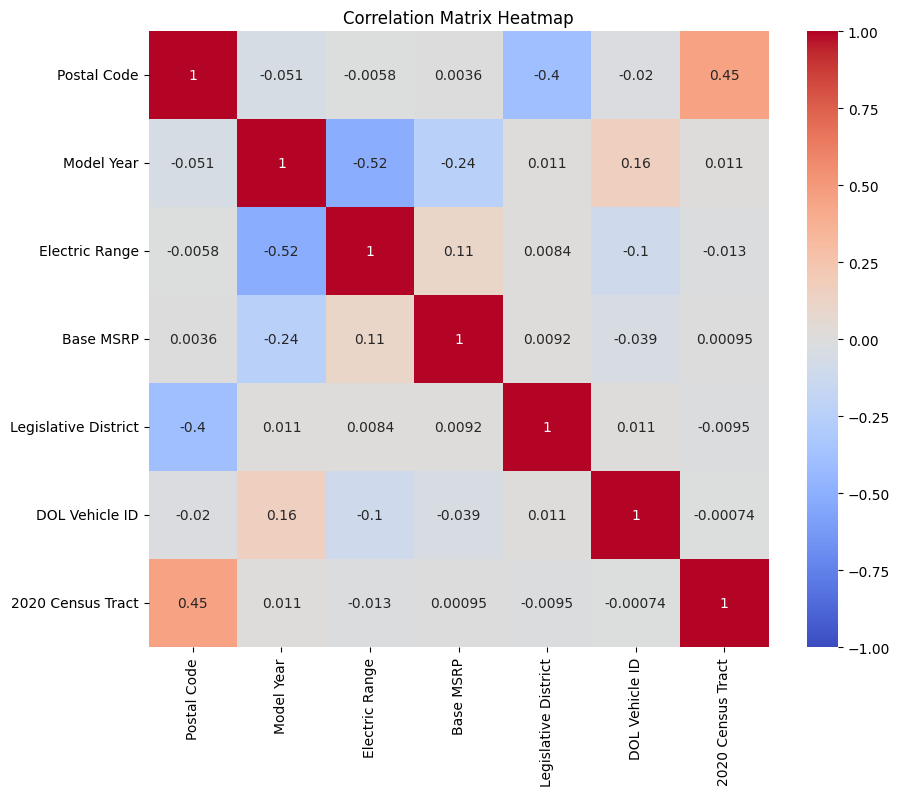

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**The correlation matrix and heatmap will show correlation coefficients ranging from -1 to 1:

Values close to 1 indicate a strong positive correlation.

Values close to -1 indicate a strong negative correlation.

Values close to 0 indicate no significant correlation.**

In [34]:
data_f.groupby('Electric Vehicle Type').agg({'Electric Range': ['sum','mean', 'median', 'std']})

Electric Range                    \
                                                  sum       mean median   
Electric Vehicle Type                                                     
Battery Electric Vehicle (BEV)                1688335  63.087026    0.0   
Plug-in Hybrid Electric Vehicle (PHEV)         236088  30.439402   30.0   

                                                    
                                               std  
Electric Vehicle Type                               
Battery Electric Vehicle (BEV)          100.624946  
Plug-in Hybrid Electric Vehicle (PHEV)   14.734935